In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 2**12 # 4096 pt FFT 
fs = 2**15 # 32768Hz sampling

# Create 1s worth of x samples
x = np.linspace(0.0, 1.0, fs)
x.shape

(32768,)

In [4]:
yt = np.sin(2 * np.pi * 1000 * x) + np.sin(2 * np.pi * 40 * x)
yt.shape

(32768,)

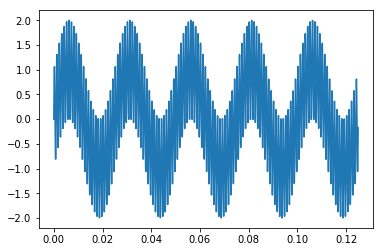

In [5]:
plt.plot(x[:N], yt[:N])

In [13]:
sp = np.fft.fft(yt)
phase = np.angle(sp)

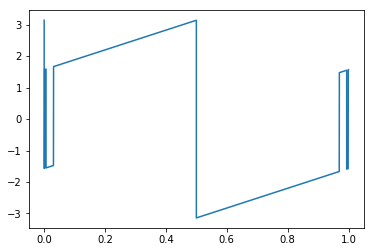

In [14]:
plt.plot(x, phase)

In [6]:
import struct

In [7]:
with open("bram_sine_init.coe", "w") as f:
    f.write(f"memory_initialization_radix=16;\n")
    f.write(f"memory_initialization_vector=\n")
    for val in yt[:N]:
        val = int(val * (10**4))
        res = struct.pack("<h", val)
        print(val)
        print(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}")
        f.write(f"{hex(res[1])[2:].zfill(2)}{hex(res[0])[2:].zfill(2)}\n")

0
0000

1982
07be

3895
0f37

5670
1626

7246
1c4e

8568
2178

9589
2575

10276
2824

10606
296e

10569
2949

10171
27bb

9427
24d3

8369
20b1

7037
1b7d

5484
156c

3769
0eb9

1958
07a6

120
0078

-1674
f976

-3357
f2e3

-4864
ed00

-6136
e808

-7125
e42b

-7792
e190

-8108
e054

-8061
e083

-7648
e220

-6882
e51e

-5788
e964

-4405
eecb

-2779
f525

-968
fc38

964
03c4

2950
0b86

4920
1338

6804
1a94

8536
2158

10054
2746

11306
2c2a

12249
2fd9

12851
3233

13092
3324

12967
32a7

12482
30c2

11658
2d8a

10528
2920

9135
23af

7535
1d6f

5787
169b

3959
0f77

2119
0847

340
0154

-1312
fae0

-2775
f529

-3991
f069

-4913
eccf

-5506
ea7e

-5744
e990

-5617
ea0f

-5126
ebfa

-4287
ef41

-3129
f3c7

-1691
f965

-23
ffe9

1814
0716

3759
0eaf

5741
166d

7689
1e09

9536
2540

11216
2bd0

12669
317d

13845
3615

14703
396f

15214
3b6e

15362
3c02

15143
3b27

14568
38e8

13661
355d

12457
30a9

11002
2afa

9352
2488

7571
1d93

5724
165c

3883
0f2b

2118
0846

494
01ee

-924
fc64

-20

e98d

-4045
f033

-2529
f61f

-1256
fb18

-273
feef

381
017d

683
02ab

620
026c

194
00c2

-581
fdbb

-1678
f972

-3057
f40f

-4669
edc3

-6456
e6c8

-8353
df5f

-10291
d7cd

-12200
d058

-14011
c945

-15659
c2d5

-17083
bd45

-18233
b8c7

-19067
b585

-19556
b39c

-19681
b31f

-19440
b410

-18841
b667

-17907
ba0d

-16674
bede

-15187
c4ad

-13501
cb43

-11678
d262

-9786
d9c6

-7895
e129

-6075
e845

-4392
eed8

-2909
f4a3

-1681
f96f

-754
fd0e

-161
ff5f

75
004b

-54
ffca

-545
fddf

-1379
fa9d

-2527
f621

-3947
f095

-5586
ea2e

-7386
e326

-9280
dbc0

-11198
d442

-13072
ccf0

-14832
c610

-16414
bfe2

-17759
baa1

-18820
b67c

-19557
b39b

-19943
b219

-19963
b205

-19618
b35e

-18920
b618

-17894
ba1a

-16578
bf3e

-15020
c554

-13277
cc23

-11413
d36b

-9496
dae8

-7596
e254

-5782
e96a

-4122
efe6

-2674
f58e

-1494
fa2a

-622
fd92

-91
ffa5

78
004e

-116
ff8c

-670
fd62

-1561
f9e7

-2758
f53a

-4214
ef8a

-5877
e90b

-7686
e1fa

-9572
da9c

-11467
d335

-13301
cc0b

-1


-14521
c747

-13594
cae6

-12373
cfab

-10904
d568

-9244
dbe4

-7456
e2e0

-5608
ea18

-3770
f146

-2012
f824

-399
fe71

1005
03ed

2148
0864

2987
0bab

3487
0d9f

3628
0e2c

3403
0d4b

2817
0b01

1891
0763

656
0290

-843
fcb5

-2557
f603

-4423
eeb9

-6374
e71a

-8342
df6a

-10257
d7ef

-12049
d0ef

-13656
caa8

-15020
c554

-16094
c122

-16840
be38

-17233
bcaf

-17259
bc95

-16921
bde7

-16233
c097

-15221
c48b

-13925
c99b

-12394
cf96

-10685
d643

-8864
dd60

-6999
e4a9

-5160
ebd8

-3416
f2a8

-1833
f8d7

-471
fe29

617
0269

1393
0571

1825
0721

1895
0767

1599
063f

946
03b2

-40
ffd8

-1327
fad1

-2868
f4cc

-4608
ee00

-6485
e6ab

-8432
df10

-10379
d775

-12256
d020

-13995
c955

-15535
c351

-16821
be4b

-17806
ba72

-18456
b7e8

-18748
b6c4

-18674
b70e

-18237
b8c3

-17454
bbd2

-16356
c01c

-14985
c577

-13391
cbb1

-11634
d28e

-9780
d9cc

-7899
e125

-6059
e855

-4331
ef15

-2778
f526

-1459
fa4d

-422
fe5a

291
0123

656
0290

658
0292

294
0126

-421
fe5b

-14

-404
fe6c

232
00e8

1199
04af

2459
099b

3964
0f7c

5659
161b

7479
1d37

9357
248d

11223
2bd7

13007
32cf

14643
3933

16070
3ec6

17234
4352

18090
46aa

18607
48af

18763
494b

18553
4879

17982
463e

17070
42ae

15848
3de8

14361
3819

12661
3175

10810
2a3a

8873
22a9

6919
1b07

5021
139d

3244
0cac

1653
0675

305
0131

-752
fd10

-1482
fa36

-1860
f8bc

-1872
f8b0

-1521
fa0f

-821
fccb

201
00c9

1506
05e2

3044
0be4

4757
1295

6580
19b4

8446
20fe

10283
282b

12022
2ef6

13599
351f

14953
3a69

16032
3ea0

16796
419c

17215
433f

17271
4377

16960
4240

16292
3fa4

15289
3bb9

13986
36a2

12429
308d

10673
29b1

8780
224c

6818
1aa2

4857
12f9

2966
0b96

1212
04bc

-340
feac

-1639
f999

-2638
f5b2

-3302
f31a

-3609
f1e7

-3550
f222

-3130
f3c6

-2365
f6c3

-1287
faf9

63
003f

1634
0662

3365
0d25

5191
1447

7043
1b83

8851
2293

10545
2931

12062
2f1e

13343
341f

14340
3804

15013
3aa5

15336
3be8

15294
3bbe

14886
3a26

14126
372e

13038
32ee

11659
2d8b

10039
2